In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [276]:
data=pd.read_csv('loan_train.csv')

In [277]:
data.head(5)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [278]:
data.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


In [280]:
data.shape

(346, 10)

In [281]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

In [282]:
data['due_date']=pd.to_datetime(data['due_date'])
data['effective_date']=pd.to_datetime(data['effective_date'])
data.head(2)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female


In [283]:
data['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [284]:
data.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [285]:
data.groupby(['education'])['loan_status'].value_counts()

education             loan_status
Bechalor              PAIDOFF         33
                      COLLECTION      11
High School or Below  PAIDOFF        112
                      COLLECTION      39
Master or Above       COLLECTION       1
                      PAIDOFF          1
college               PAIDOFF        114
                      COLLECTION      35
Name: loan_status, dtype: int64

In [286]:
data['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0


In [287]:
data['dayofweek'] = data['effective_date'].dt.dayofweek
data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4


In [288]:
data['weekend'] = data['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [289]:
cat_feats=['education']

In [290]:
final_df=pd.get_dummies(data,columns=cat_feats)

In [291]:
final_df.head(2)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,Gender,dayofweek,weekend,education_Bechalor,education_High School or Below,education_Master or Above,education_college
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,0,3,0,0,1,0,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,1,3,0,1,0,0,0


In [292]:
df=final_df.drop('education_Master or Above',axis=1)

In [293]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,Gender,dayofweek,weekend,education_Bechalor,education_High School or Below,education_college
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,0,3,0,0,1,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,1,3,0,1,0,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,0,3,0,0,0,1
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,1,4,1,0,0,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,0,4,1,0,0,1


In [294]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'Gender', 'dayofweek', 'weekend',
       'education_Bechalor', 'education_High School or Below',
       'education_college'],
      dtype='object')

In [295]:
df=df.drop(['Unnamed: 0', 'Unnamed: 0.1','effective_date', 'due_date', 'dayofweek'],axis=1)

In [296]:
df.head()

,loan_status,Principal,terms,age,Gender,weekend,education_Bechalor,education_High School or Below,education_college
0,PAIDOFF,1000,30,45,0,0,0,1,0
1,PAIDOFF,1000,30,33,1,0,1,0,0
2,PAIDOFF,1000,15,27,0,0,0,0,1
3,PAIDOFF,1000,30,28,1,1,0,0,1
4,PAIDOFF,1000,30,29,0,1,0,0,1


In [297]:
X=df.drop('loan_status',axis=1).values
y=df['loan_status'].values

In [298]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [299]:
X=scaler.fit(X).transform(X)

In [300]:
from sklearn.model_selection import train_test_split

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [302]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


# KNeighbors Classifier

In [303]:
from sklearn.neighbors import KNeighborsClassifier

In [304]:
#Train Model and Predict

knn = KNeighborsClassifier(n_neighbors = 1)

In [305]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [306]:
pred=knn.predict(X_test)

In [307]:
from sklearn import metrics

In [308]:
from sklearn.metrics import confusion_matrix,classification_report

In [309]:
print(confusion_matrix(y_test,pred))

[[ 3 15]
 [11 41]]


In [310]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

  COLLECTION       0.21      0.17      0.19        18
     PAIDOFF       0.73      0.79      0.76        52

    accuracy                           0.63        70
   macro avg       0.47      0.48      0.47        70
weighted avg       0.60      0.63      0.61        70



#


In [311]:
error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

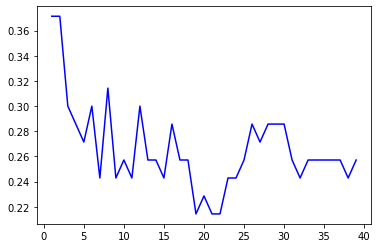

In [312]:
plt.plot(range(1,40),error_rate,color='blue')

In [313]:
#for better result use k=19
knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[ 5 13]
 [ 2 50]]


              precision    recall  f1-score   support

  COLLECTION       0.71      0.28      0.40        18
     PAIDOFF       0.79      0.96      0.87        52

    accuracy                           0.79        70
   macro avg       0.75      0.62      0.63        70
weighted avg       0.77      0.79      0.75        70



# Decision Tree

In [314]:
from sklearn.tree import DecisionTreeClassifier

In [366]:
dtree=DecisionTreeClassifier(criterion='entropy',max_depth=9)

In [367]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [368]:
D_pred=dtree.predict(X_test)

In [369]:
print(confusion_matrix(y_test,D_pred))

[[ 4 14]
 [ 4 48]]


In [370]:
print(classification_report(y_test,D_pred))

              precision    recall  f1-score   support

  COLLECTION       0.50      0.22      0.31        18
     PAIDOFF       0.77      0.92      0.84        52

    accuracy                           0.74        70
   macro avg       0.64      0.57      0.57        70
weighted avg       0.70      0.74      0.70        70



# SVM

In [371]:
from sklearn.svm import SVC

In [372]:
svc_model=SVC()

In [373]:
svc_model.fit(X_train,y_train)

SVC()

In [374]:
svc_pred=svc_model.predict(X_test)

In [376]:
print(confusion_matrix(y_test,svc_pred))

[[ 0 18]
 [ 0 52]]


In [377]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        18
     PAIDOFF       0.74      1.00      0.85        52

    accuracy                           0.74        70
   macro avg       0.37      0.50      0.43        70
weighted avg       0.55      0.74      0.63        70



C:\Users\ARIF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ARIF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ARIF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [379]:
# for better performance
from sklearn.model_selection import GridSearchCV

In [380]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [381]:
grid=GridSearchCV(SVC(),param_grid,verbose=2)

In [382]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [383]:
grid.best_params_

{'C': 0.1, 'gamma': 1}

In [385]:
final_svc_pred=grid.predict(X_test)

In [386]:
print(classification_report(y_test,final_svc_pred))

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        18
     PAIDOFF       0.74      1.00      0.85        52

    accuracy                           0.74        70
   macro avg       0.37      0.50      0.43        70
weighted avg       0.55      0.74      0.63        70



C:\Users\ARIF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ARIF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ARIF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [387]:
print(confusion_matrix(y_test,final_svc_pred))

[[ 0 18]
 [ 0 52]]


# Logistic Regression

In [389]:
from sklearn.linear_model import LogisticRegression

In [390]:
lr_model=LogisticRegression()

In [391]:
lr_model.fit(X_train,y_train)

LogisticRegression()

In [393]:
lr_pred=lr_model.predict(X_test)

In [394]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

  COLLECTION       1.00      0.11      0.20        18
     PAIDOFF       0.76      1.00      0.87        52

    accuracy                           0.77        70
   macro avg       0.88      0.56      0.53        70
weighted avg       0.83      0.77      0.70        70



In [395]:
print(confusion_matrix(y_test,lr_pred))

[[ 2 16]
 [ 0 52]]


# Model Evaluation by using test set

In [396]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [441]:
test=pd.read_csv('loan_test.csv')

In [442]:
test.head(2)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male


In [443]:
test['due_date']=pd.to_datetime(test['due_date'])
test['effective_date']=pd.to_datetime(test['effective_date'])

test['dayofweek']=test['effective_date'].dt.dayofweek
test['weekend']=test['dayofweek'].apply(lambda x:1 if (x>3) else 0)
test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [444]:
cat_feats=['education']
test_df=pd.get_dummies(test,columns=cat_feats)

test_df=test_df.drop('education_Master or Above',axis=1)
test_df=test_df.drop(['Unnamed: 0', 'Unnamed: 0.1','effective_date', 'due_date', 'dayofweek'],axis=1)


In [445]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,loan_status,Principal,terms,age,Gender,weekend,education_Bechalor,education_High School or Below,education_college
0,PAIDOFF,1000,30,50,1,0,1,0,0
1,PAIDOFF,300,7,35,0,1,0,0,0
2,PAIDOFF,1000,30,43,1,1,0,1,0
3,PAIDOFF,1000,30,26,0,1,0,0,1
4,PAIDOFF,800,15,29,0,1,1,0,0


In [470]:
test_X=test_df.drop('loan_status',axis=1).values
test_y=test_df['loan_status'].values

In [471]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [472]:
test_X=scaler.fit(X).transform(X)

In [473]:
#KNN Evaluation
test_knn_pred = knn.predict(test_X)
print("KNN Jaccard index: %.2f " % jaccard_score(test_y, test_knn_pred,pos_label= 'PAIDOFF'))
print("KNN F1-score: %.2f " % f1_score(test_y, test_knn_pred,pos_label='PAIDOFF'))

KNN Jaccard index: 0.72 
KNN F1-score: 0.84 


In [474]:
#Decision Tree Evaluation
test_dtree_pred = dtree.predict(test_X)
print("dtree Jaccard index: %.2f " % jaccard_score(test_y, test_dtree_pred,pos_label= 'PAIDOFF'))
print("dtree F1-score: %.2f " % f1_score(test_y, test_dtree_pred,pos_label='PAIDOFF'))

dtree Jaccard index: 0.69 
dtree F1-score: 0.82 


In [475]:
#SVM Evaluation
test_svc_pred = svc_model.predict(test_X)
print("SVM Jaccard index: %.2f " % jaccard_score(test_y, test_svc_pred,pos_label= 'PAIDOFF'))
print("SVM F1-score: %.2f " %  f1_score(test_y, test_svc_pred,pos_label='PAIDOFF'))

SVM Jaccard index: 0.72 
SVM F1-score: 0.84 


In [476]:
#Logistics Regression Evaluation
test_lr_pred = lr_model.predict(test_X)
test_lr_pred_prob = lr_model.predict_proba(test_X)
print("LR Jaccard index: %.2f" % jaccard_score(test_y, test_lr_pred, pos_label='PAIDOFF'))
print("LR F1-score: %.2f" % f1_score(test_y, test_lr_pred, pos_label='PAIDOFF') )
print("LR LogLoss: %.2f" % log_loss(test_y, test_lr_pred_prob))

LR Jaccard index: 0.75
LR F1-score: 0.86
LR LogLoss: 0.49
